### Image Data Inspection

**Q1. What is COCO?**

`COCO` stands for `Common Objects in Context`. It's a large, publicly available dataset of images used to train and test computer vision models for tasks like object detection and image segmentation.

**Q2. What does it Contain?**

The `COCO 2017` dataset contains hundreds of thousands of real-world photographs with detailed annotations. Each image typically has multiple objects of different types, and each object is carefully labeled with:

- A bounding box (rectangular border around the object)

- A segmentation mask (precise pixel-level outline of the object)

- The object's category/class name (e.g., "person", "car", "dog")

- Dataset Size:

  - 118,000 training images (for teaching the model)

  - 5,000 validation images (for testing during training)

  - 40,700 test images (for final model evaluation)

  - 80 object categories to detect (things like people, animals, vehicles, furniture, etc.)

  - Over 1.5 million labeled objects across all images

**Q3. How is it organized?**

The dataset has a folder structure with:

- Images folder: Contains actual `.jpg` image files

- Annotations folder: Contains `JSON` files with all the labeling information (bounding boxes, masks, categories, etc.)

#### Import Libraries and Set Paths
- Set up the environment by importing necessary libraries and defining the paths to your COCO dataset folders and annotation files.

Loading annotations...
Visualizing image: 000000397133.jpg
Found 19 annotations for this image.


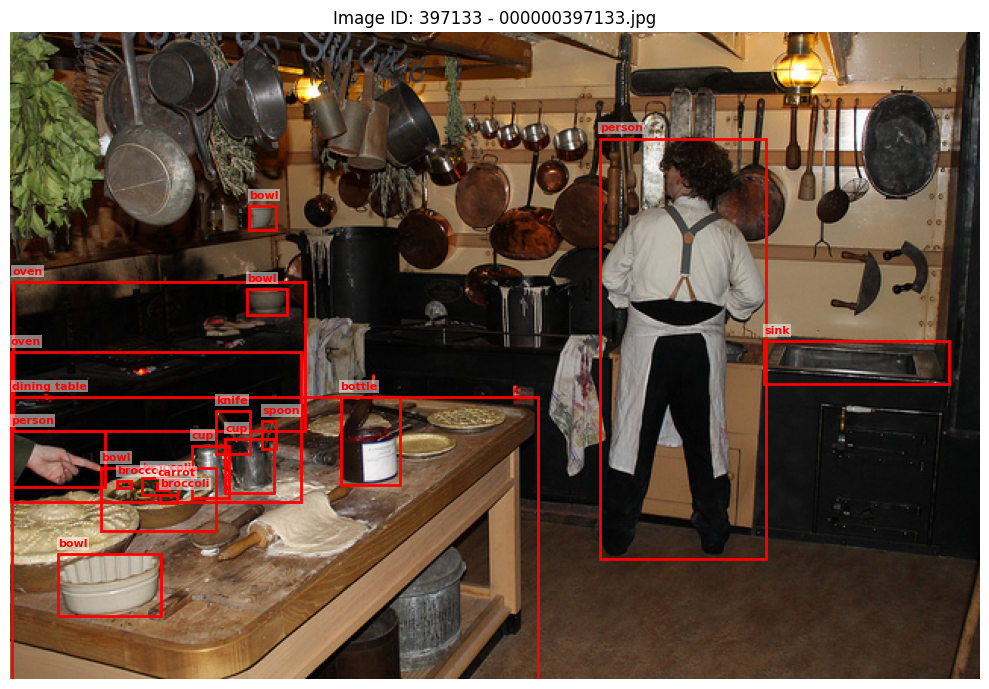

In [10]:
import os
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon # Now correctly imported

# --- Configuration ---
# Path to extract COCO Dataset
coco_root = "D:\\archive\\coco2017"
images_dir = os.path.join(coco_root, "val2017")
annotations_file = os.path.join(coco_root, "annotations", "instances_val2017.json")

# 1. Load the annotations
print("Loading annotations...")
try:
    with open(annotations_file, 'r') as f:
        coco_data = json.load(f)
except FileNotFoundError:
    print(f"Error: Annotations file not found at {annotations_file}")
    exit()

# Get a mapping for categories
categories = {cat['id']: cat['name'] for cat in coco_data.get('categories', [])}

# 2. Select and Display an Image
if not coco_data.get('images'):
    print("Error: No images found in the COCO data.")
    exit()
    
# Select the first image
image_info = coco_data['images'][0]
image_id = image_info['id']
file_name = image_info['file_name']
image_path = os.path.join(images_dir, file_name)

print(f"Visualizing image: {file_name}")

try:
    # Load the image
    img = Image.open(image_path).convert('RGB')
    img_np = np.array(img)
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
    exit()

# Create the figure and axes
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(img_np)
ax.set_title(f"Image ID: {image_id} - {file_name}", fontsize=12)
ax.axis('off')

# 3. Draw Annotations (Bounding Boxes)
image_annotations = [
    ann for ann in coco_data.get('annotations', []) if ann.get('image_id') == image_id
]

print(f"Found {len(image_annotations)} annotations for this image.")

# Draw each bounding box
for ann in image_annotations:
    if 'bbox' in ann:
        # COCO bounding box format: [x, y, width, height]
        bbox = ann['bbox'] 
        
        # Create the Rectangle patch
        rect = Rectangle(
            (bbox[0], bbox[1]), # (x, y) starting point (top-left corner)
            bbox[2],             # width
            bbox[3],             # height
            linewidth=2,
            edgecolor='r',       
            facecolor='none'     
        )
        
        # Add the patch to the Axes
        ax.add_patch(rect)
        
        # Optionally add the category label
        category_name = categories.get(ann.get('category_id'), 'Unknown')
        ax.text(
            bbox[0], 
            bbox[1] - 5,
            category_name, 
            color='red', 
            fontsize=8, 
            weight='bold',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1)
        )

# Display the image with bounding boxes
plt.tight_layout()
plt.show()

#### Load COCO Annotations
- Now load up the `COCO JSON` annotation file and parses it into Python dictionaries for efficient data access.

In [11]:
# Load COCO annotations
with open(annotations_file, 'r') as f:
    coco_data = json.load(f)

# Create dictionaries for quick lookup
images_by_id = {img['id']: img for img in coco_data['images']}
categories_by_id = {cat['id']: cat for cat in coco_data['categories']}

# Group annotations by image_id
annotations_by_image = {}
for ann in coco_data['annotations']:
    img_id = ann['image_id']
    if img_id not in annotations_by_image:
        annotations_by_image[img_id] = []
    annotations_by_image[img_id].append(ann)

print(f"Total images: {len(coco_data['images'])}")
print(f"Total categories: {len(coco_data['categories'])}")
print(f"Total annotations: {len(coco_data['annotations'])}")

Total images: 5000
Total categories: 80
Total annotations: 36781


#### Display Dataset Statistics
- This function analyzes the entire dataset and prints statistics about object distribution across categories to understand dataset composition.



In [12]:
def print_dataset_stats():
    print("\n--- Dataset Statistics ---")
    category_counts = {}
    for ann in coco_data['annotations']:
        cat_id = ann['category_id']
        cat_name = categories_by_id[cat_id]['name']
        category_counts[cat_name] = category_counts.get(cat_name, 0) + 1

    print("\nObject counts per category (top 10):")
    sorted_cats = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    for cat_name, count in sorted_cats:
        print(f"  {cat_name}: {count}")
print_dataset_stats()


--- Dataset Statistics ---

Object counts per category (top 10):
  person: 11004
  car: 1932
  chair: 1791
  book: 1161
  bottle: 1025
  cup: 899
  dining table: 697
  traffic light: 637
  bowl: 626
  handbag: 540


#### Inspect Single Image with Annotations
- This core function that loads a specific image by ID and displays its metadata, objects, and visualizations with bounding boxes and segmentation masks.

In [13]:
def inspect_image_with_annotations(image_id, visualize_bbox=True, visualize_mask=True):
    # Load image
    image_info = images_by_id[image_id]
    image_path = os.path.join(images_dir, image_info['file_name'])
    image = Image.open(image_path).convert("RGB")

    # Print image info
    print(f"\n--- Image Inspection ---")
    print(f"Image ID: {image_id}")
    print(f"Filename: {image_info['file_name']}")
    print(f"Size: {image.size} (width x height)")
    print(f"Mode: {image.mode}")

    # Get annotations for this image
    annotations = annotations_by_image.get(image_id, [])
    print(f"Number of objects: {len(annotations)}")

    # Print object categories in this image
    print("\nObjects in this image:")
    for ann in annotations:
        cat_id = ann['category_id']
        cat_name = categories_by_id[cat_id]['name']
        bbox = ann['bbox']
        area = ann['area']
        print(f"  - {cat_name}: bbox={bbox}, area={area:.0f}px")

    # Visualize
    if visualize_bbox or visualize_mask:
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.imshow(image)

        # Draw bounding boxes
        if visualize_bbox:
            for ann in annotations:
                bbox = ann['bbox']
                x, y, w, h = bbox
                rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)

                cat_id = ann['category_id']
                cat_name = categories_by_id[cat_id]['name']
                ax.text(x, y-5, cat_name, fontsize=8, color='red',
                       bbox=dict(facecolor='white', alpha=0.7))

        # Draw segmentation masks
        if visualize_mask:
            for ann in annotations:
                if 'segmentation' in ann and len(ann['segmentation']) > 0:
                    seg = ann['segmentation'][0]  # Get first polygon
                    if isinstance(seg, list) and len(seg) > 4:
                        # Reshape to (N, 2) for polygon
                        polygon = np.array(seg).reshape(-1, 2)
                        poly = Polygon(polygon, alpha=0.3, color='blue')
                        ax.add_patch(poly)

        ax.axis('off')
        ax.set_title(f"Image ID: {image_id}")
        plt.tight_layout()
        plt.show()

#### Inspect Image by Index

- This helper function allows to inspect images by their position in the dataset (0, 1, 2, etc.) without needing to know the image ID.


--- Image Inspection ---
Image ID: 397133
Filename: 000000397133.jpg
Size: (640, 427) (width x height)
Mode: RGB
Number of objects: 19

Objects in this image:
  - bottle: bbox=[217.62, 240.54, 38.99, 57.75], area=1481px
  - dining table: bbox=[1.0, 240.24, 346.63, 186.76], area=54086px
  - person: bbox=[388.66, 69.92, 109.41, 277.62], area=17377px
  - knife: bbox=[135.57, 249.43, 22.32, 28.79], area=123px
  - bowl: bbox=[31.28, 344.0, 68.12, 40.83], area=2136px
  - bowl: bbox=[59.63, 287.36, 76.07, 41.3], area=2016px
  - oven: bbox=[1.36, 164.33, 192.56, 98.37], area=10059px
  - person: bbox=[0.0, 262.81, 62.16, 36.77], area=1038px
  - cup: bbox=[119.4, 272.51, 24.82, 34.25], area=415px
  - cup: bbox=[141.47, 267.91, 32.19, 35.86], area=943px
  - bowl: bbox=[155.97, 168.95, 26.03, 17.13], area=352px
  - bowl: bbox=[157.2, 114.15, 17.86, 15.82], area=218px
  - broccoli: bbox=[98.75, 304.78, 10.78, 5.57], area=32px
  - spoon: bbox=[166.03, 256.36, 8.82, 18.58], area=99px
  - broccoli: b

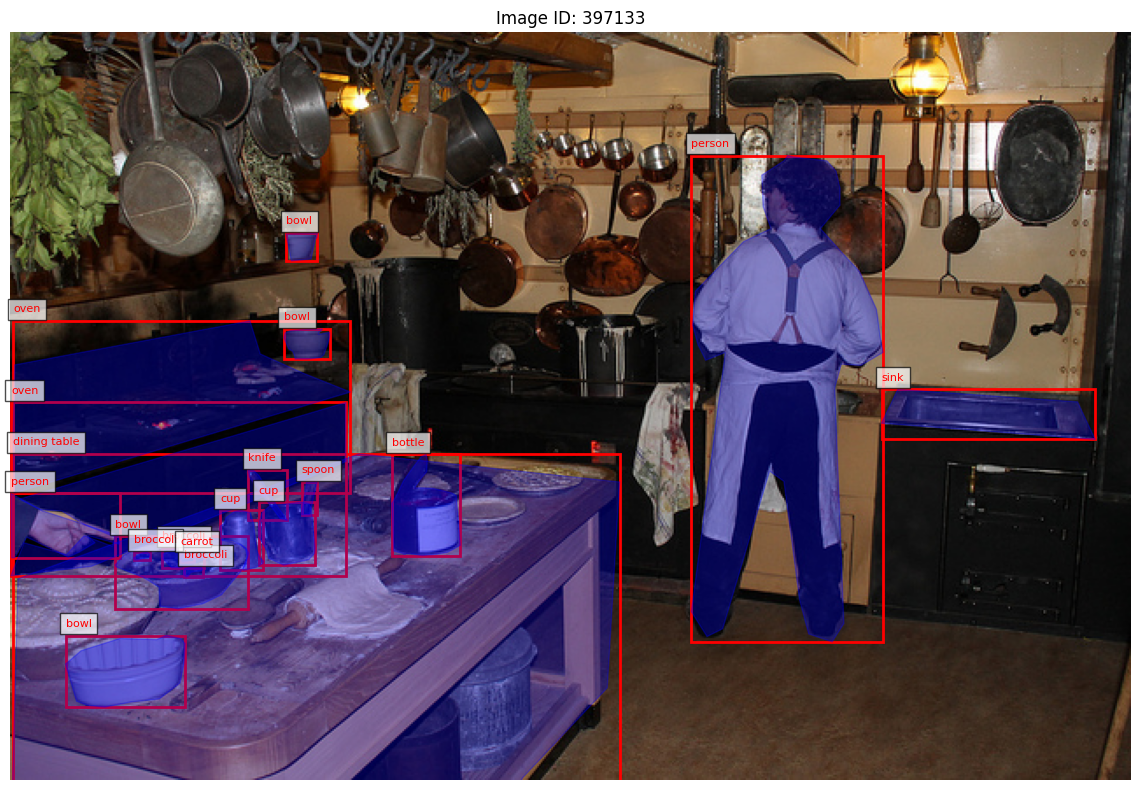

In [14]:
def inspect_image_by_index(index=0):
    image_ids = list(images_by_id.keys())
    if index < len(image_ids):
        image_id = image_ids[index]
        inspect_image_with_annotations(image_id, visualize_bbox=True, visualize_mask=True)
    else:
        print(f"Index {index} out of range. Total images: {len(image_ids)}")

inspect_image_by_index(index=0)

#### Inspect Random Images

- This function randomly selects and inspects multiple images from the dataset to get a diverse view of different samples.


--- Image Inspection ---
Image ID: 357816
Filename: 000000357816.jpg
Size: (500, 455) (width x height)
Mode: RGB
Number of objects: 10

Objects in this image:
  - sports ball: bbox=[405.63, 189.18, 20.7, 22.14], area=351px
  - person: bbox=[401.94, 46.87, 97.11, 201.63], area=10125px
  - person: bbox=[13.32, 65.07, 293.09, 382.24], area=38511px
  - person: bbox=[1.21, 80.32, 95.6, 208.57], area=11258px
  - baseball bat: bbox=[267.77, 184.36, 83.88, 51.45], area=1512px
  - baseball glove: bbox=[347.49, 104.89, 36.84, 33.36], area=913px
  - car: bbox=[3.38, 5.38, 301.75, 80.52], area=12320px
  - bench: bbox=[179.13, 102.7, 285.17, 147.66], area=7251px
  - umbrella: bbox=[17.94, 28.27, 105.81, 95.15], area=4889px
  - person: bbox=[284.82, 1.18, 98.09, 260.0], area=11526px


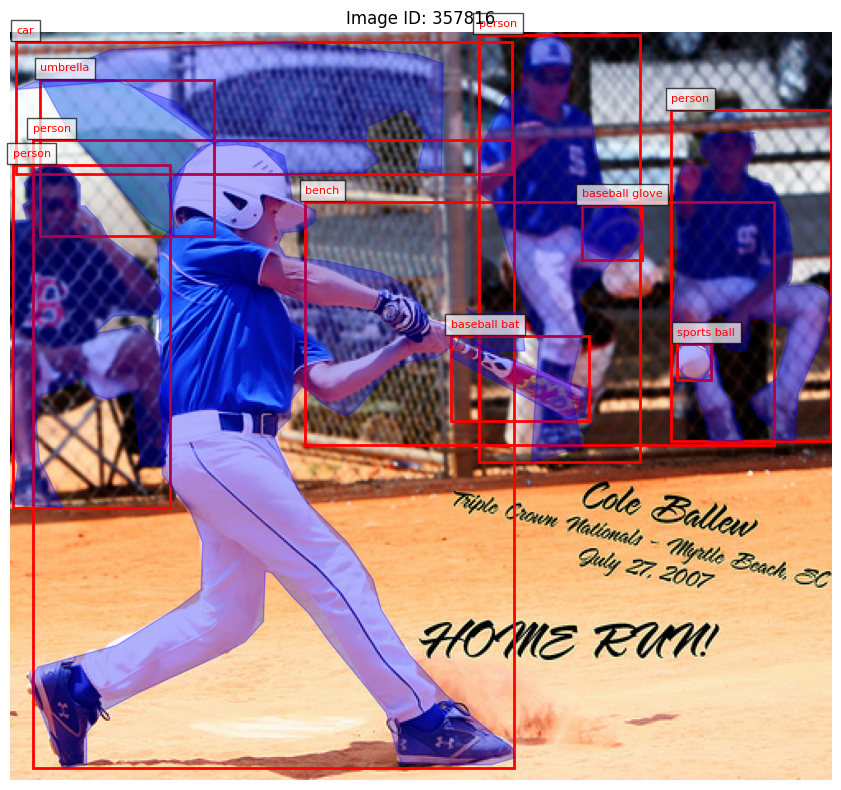


--- Image Inspection ---
Image ID: 25560
Filename: 000000025560.jpg
Size: (640, 480) (width x height)
Mode: RGB
Number of objects: 4

Objects in this image:
  - tv: bbox=[155.86, 1.13, 399.81, 260.89], area=84668px
  - cat: bbox=[133.45, 185.1, 376.55, 159.31], area=34918px
  - person: bbox=[189.84, 29.12, 162.88, 195.24], area=18871px
  - cup: bbox=[0.46, 423.5, 78.27, 56.5], area=3504px


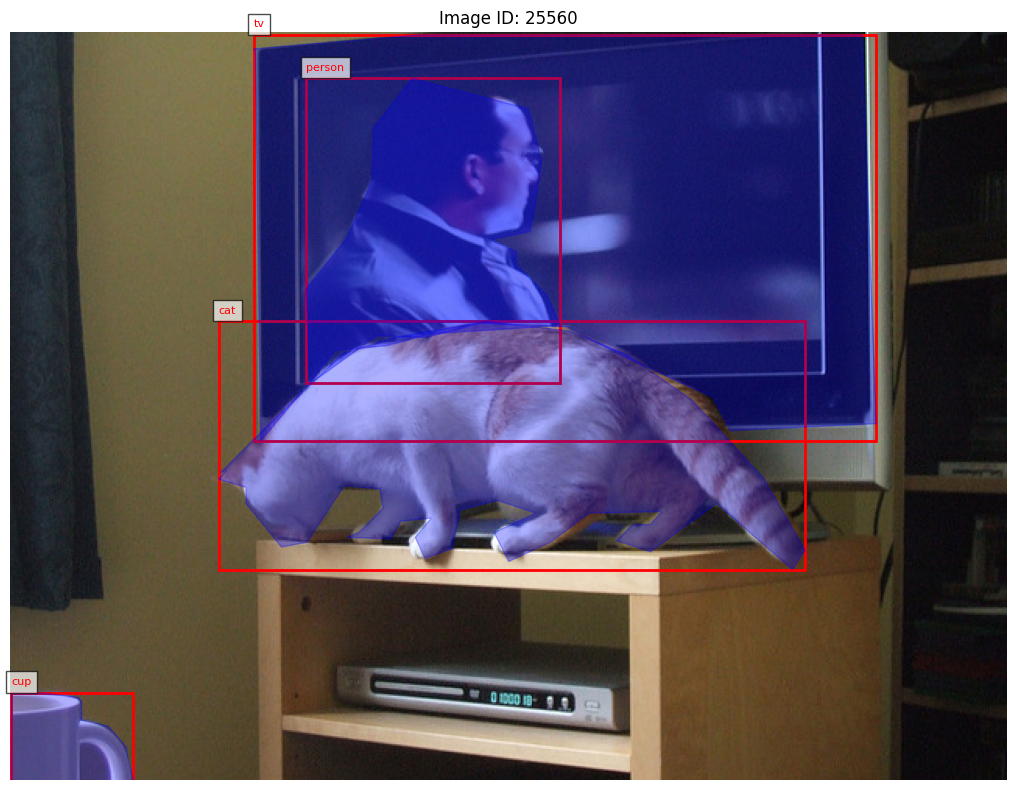


--- Image Inspection ---
Image ID: 206025
Filename: 000000206025.jpg
Size: (424, 640) (width x height)
Mode: RGB
Number of objects: 2

Objects in this image:
  - tie: bbox=[167.06, 373.48, 85.14, 266.52], area=17264px
  - person: bbox=[4.33, 79.1, 419.67, 550.43], area=156460px


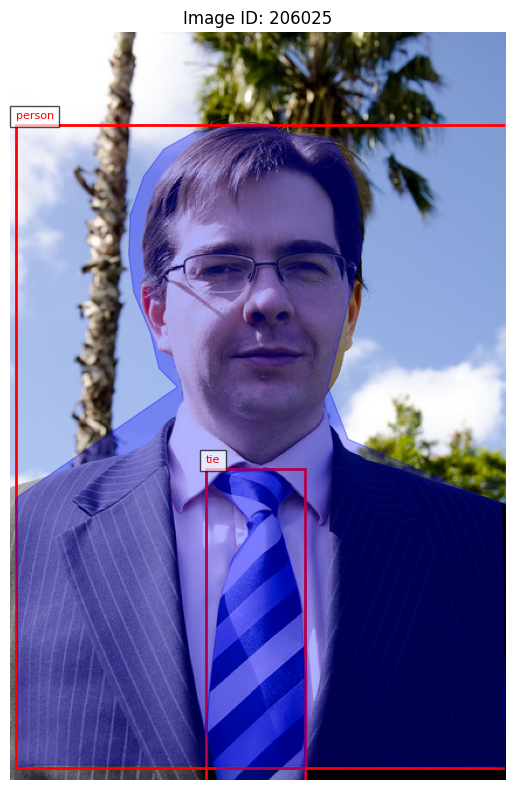

In [15]:
def inspect_random_images(num_samples=3):
    import random
    random_image_ids = random.sample(list(images_by_id.keys()), num_samples)

    for img_id in random_image_ids:
        inspect_image_with_annotations(img_id, visualize_bbox=True, visualize_mask=True)

inspect_random_images(num_samples=3)